<a href="https://colab.research.google.com/github/TAUforPython/OptimalContorl/blob/main/LQR_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import*
from matplotlib import pyplot as plt
from scipy.linalg import*

In [2]:
def lqr(A,B,Q,R):
    # решаем уравнение Риккати 
    S = matrix(solve_continuous_are(A, B, Q, R))
    # определяем матрицу коэффициентов для оптимального уравнения
    K = matrix(inv(R)*(B.T*S))
    E = eig(A-B*K)[0]
    return K, S, E   

In [3]:
# Коэффициенты объекта
A = matrix([[-100, 0, 0],[150, -15, -195],[0, 1, 0]]);
B = matrix([[230], [0], [0]]);
C = eye(3)
D = zeros([3,1])

In [4]:
# Матрицы весовых коэффициентов
R = [[2]]
Q = matrix([[10, 0, 0],[0, 10, 0],[0, 0, 10]]);
# Синтез LQR-оптимального регулятора
[K,S,E] = lqr(A,B,Q,R)

In [25]:
# Вычисление составляющих функционала
Alqr = A - B*K;
AlqrLyap = Alqr.T;
x0 = matrix([[220], [147], [162]]);
Ct = C.T;
P1 = solve_lyapunov(AlqrLyap,Ct*Q*C)
Kt = K.T;
x0t = x0.T;
Jx = abs((x0t*P1*x0)[0,0])
P2 = solve_lyapunov(NN,Kt*R*K);
Ju = abs((x0t*P2*x0)[0,0])

In [16]:
print(Jx, Ju)

403428.3355905355 5015.978983556285


In [6]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 7.9 MB/s eta 0:00:00


In [21]:
import control
# составляем передаточную функцию
w_lqr = control.ss(Alqr,B,C,D)
w = control.ss(A,B,C,D)

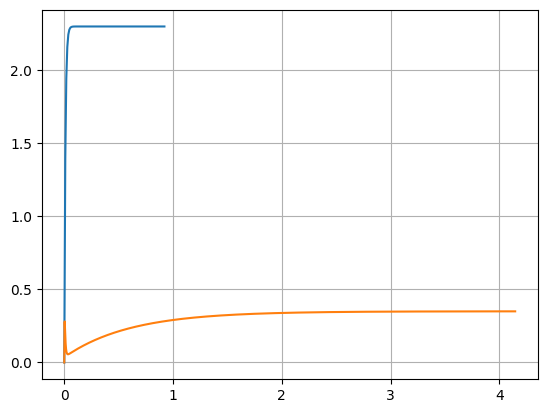

In [24]:
t, y = control.step_response(w[0,0])
t_lqr, y_lqr = control.step_response(w_lqr[0,0])
plt.plot(t,y)
plt.plot(t_lqr,y_lqr)
plt.grid(True)

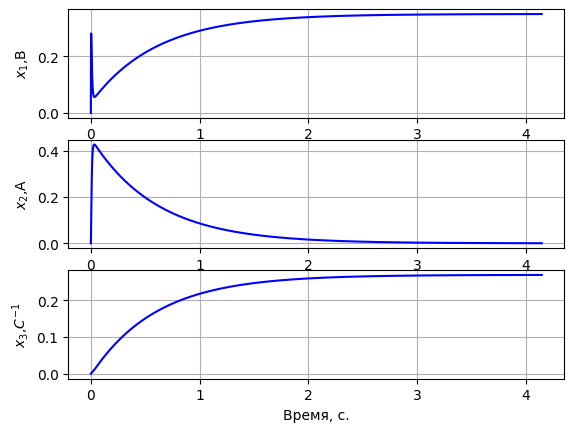

In [10]:
fig = plt.figure()
#plt.suptitle('Переходные функции в системе управления при R = %s,\n\
#$J_{x}$= %s; $J_{u}$ = %s]'%(R[0][0],round(Jx,1),round(Ju,1)))
ax1 = fig.add_subplot(311)
x,y = control.step_response(w[0,0])
ax1.plot(x,y,"b")
plt.ylabel('$x_{1}$,B')
ax1.grid(True)
ax2 = fig.add_subplot(312)
x,y = control.step_response(w[1,0])
ax2.plot(x,y,"b")
plt.ylabel('$x_{2}$,A')
ax2.grid(True)
ax3 = fig.add_subplot(313)
x,y = control.step_response(w[2,0])
ax3.plot(x,y,"b")
plt.ylabel('$x_{3}$,$C^{-1}$')
ax3.grid(True)
plt.xlabel('Время, с.')
plt.show()